In [1]:
import torch
import hyperParams as params
import dataset
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision.utils import save_image

In [2]:
class Generator(nn.Module):
        def __init__(self):
            super(Generator, self).__init__()
            self.conv_transpose1 = nn.ConvTranspose2d(params.latent_size, 64*16, kernel_size=4, stride=1, padding=0, bias=False)
            self.bn1 = nn.BatchNorm2d(64*16)
            self.relu1 = nn.ReLU()
            self.conv_transpose2 = nn.ConvTranspose2d(64*16, 64*8, kernel_size=4, stride=2, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(64*8)
            self.relu2 = nn.ReLU()
            self.conv_transpose3 = nn.ConvTranspose2d(64*8, 64*4, kernel_size=4, stride=2, padding=1, bias=False)
            self.bn3 = nn.BatchNorm2d(64*4)
            self.relu3 = nn.ReLU()
            self.conv_transpose4 = nn.ConvTranspose2d(64*4, 64*2, kernel_size=4, stride=2, padding=1, bias=False)
            self.bn4 = nn.BatchNorm2d(64*2)
            self.relu4 = nn.ReLU()
            self.conv_transpose5 = nn.ConvTranspose2d(64*2, 3, kernel_size=4, stride=2, padding=1, bias=False)
            self.tanh = nn.Tanh()

        def forward(self, input):
            x = self.relu1(self.bn1(self.conv_transpose1(input)))
            x = self.relu2(self.bn2(self.conv_transpose2(x)))
            x = self.relu3(self.bn3(self.conv_transpose3(x)))
            x = self.relu4(self.bn4(self.conv_transpose4(x)))
            x = self.tanh(self.conv_transpose5(x))
            return x
    

In [3]:
model_path = "models/generator_model_901.pth"
generator = Generator()  # Instantiate your generator model class
generator.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [4]:
transform = transforms.Compose([
    transforms.Resize((params.imgL, params.imgW)),
    # transforms.CenterCrop((params.imgL, params.imgW)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5, 0.5, 0.5))
])

In [23]:

# Convert the generated image tensor to a PIL image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


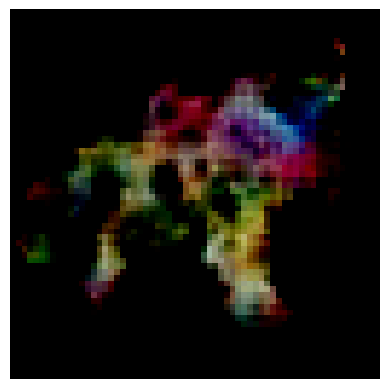

In [23]:
import matplotlib.pyplot as plt
transform = transforms.ToPILImage()
noise = torch.randn(1, 128, 1, 1)

# Generate image using the generator
with torch.no_grad():
    generated_image = generator(noise)

# Convert the image tensor to a PIL image
image_pil = generated_image.squeeze(0).permute(1, 2, 0).numpy() # Squeeze to remove batch dimension if present

# Display the image
plt.imshow(image_pil)
plt.axis('off')
plt.show()

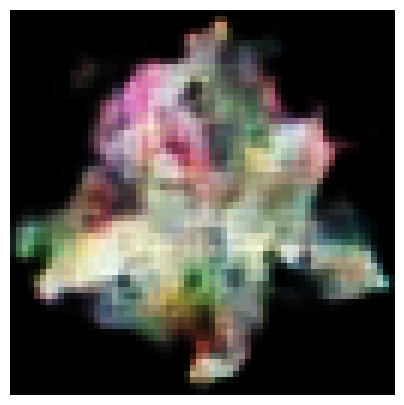

In [46]:
fixed_noise = torch.randn(1, 128, 1, 1)
Bfake = generator(fixed_noise)

grid_img = torchvision.utils.make_grid(Bfake[:1], normalize=True)
grid_img_np = grid_img.numpy()

# Transpose the array to match matplotlib's format
grid_img_np = grid_img_np.transpose((1, 2, 0))

# Display the grid image
plt.figure(figsize=(5,5))
plt.imshow(grid_img_np)
plt.axis('off')  # Turn off axis
plt.show()


In [47]:
import cv2
import numpy as np

# Assuming img_np is your 64x64x3 NumPy array
# img_np = grid_img_np  # Your NumPy array
img_np = (grid_img_np * 255).astype(np.uint8)
# Upscale the image using OpenCV
upscaled_img = cv2.resize(img_np, (2160, 4096 ), interpolation=cv2.INTER_LINEAR)

# Flatten the upscaled image into a vector
# vectorized_img = upscaled_img.reshape(-1, 3)
cv2.imwrite('output_contour_image.jpg', upscaled_img)
# Display the vectorized image
# print(vectorized_img.shape)

True

In [76]:
from PIL import Image, ImageEnhance
import numpy as np

def posterize_channel(channel, num_colors):
    quantized_values = np.linspace(0, 255, num_colors)
    return np.uint8(np.digitize(channel, quantized_values) * (255 / num_colors))

# Load an image
input_image = Image.open('output_contour_image.jpg')

# Convert the image to RGB mode
input_image = input_image.convert('RGB')

# Split the image into RGB channels
r, g, b = input_image.split()

# Posterize each channel with specified number of colors
num_colors_red = 10
num_colors_green = 5
num_colors_blue = 5

posterized_r = posterize_channel(np.array(r), num_colors_red)
posterized_g = posterize_channel(np.array(g), num_colors_green)
posterized_b = posterize_channel(np.array(b), num_colors_blue)

# Combine the posterized channels back into a single image
merged_array = np.dstack((posterized_r, posterized_g, posterized_b))
posterized_image = Image.fromarray(merged_array.astype(np.uint8))

# Enhance the color saturation
enhancer = ImageEnhance.Color(posterized_image)
boosted_image = enhancer.enhance(2.0)  # Increase the saturation by a factor of 2.0

# Enhance the contrast
enhancer = ImageEnhance.Contrast(boosted_image)
high_contrast_image = enhancer.enhance(2.0)  # Increase the contrast by a factor of 2.0

# Save or display the boosted and contrast-enhanced image
high_contrast_image.save('output_boosted_image.jpg')
# Or display it using high_contrast_image.show()


In [71]:
merged_array.shape

(4096, 2160, 9)